In [32]:
using Pkg
Pkg.activate(".")

using Distributions
using MCMCChains
using MCMCDiagnosticTools
using Statistics
using StatsPlots

  Activating project at `~/mcmcexperiments/mhr`


In [76]:
include("klhr.jl")

klhr (generic function with 1 method)

In [33]:
BS.set_bridgestan_path!(homedir() * "/bridgestan")

bsm = BS.StanModel("../stan/normal.stan",
                   "../stan/normal.json");

┌ Warning: Loading a shared object '/Users/edward/mcmcexperiments/stan/normal_model.so' which is already loaded.
│ If the file has changed since the last time it was loaded, this load may not update the library!
└ @ BridgeStan ~/.julia/packages/BridgeStan/Qc2Lj/src/model.jl:60


In [78]:
draws = klhr(bsm; M = 100_000);

acceptance rate = 1.0


In [79]:
warmup = 1_000
samples = draws[warmup:end, :]
d, p = size(samples)
samples = reshape(samples, d, 1, p);

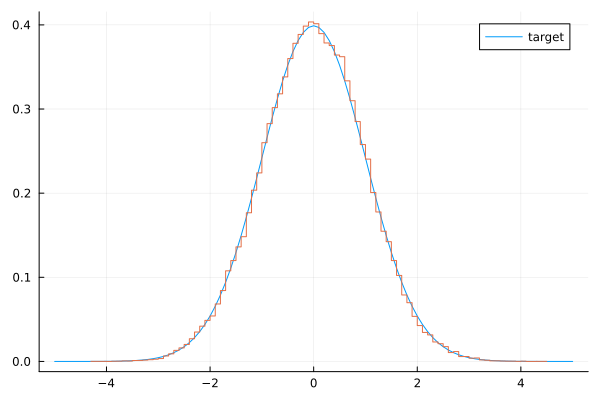

In [80]:
N = Normal(0, 1)
x = -5:0.1:5
plot(x, pdf.(N, x), label="target")
stephist!(samples[:, :, 1], normalize = true, label = "")

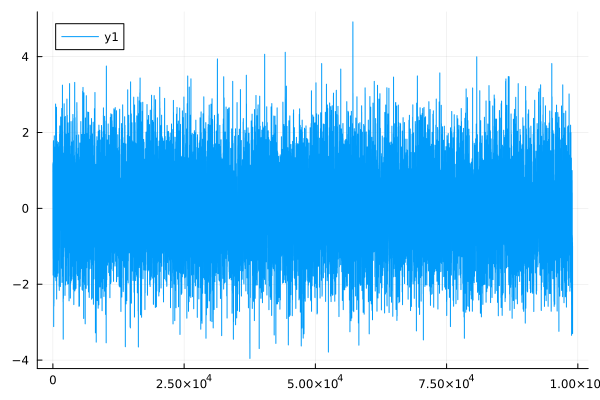

In [81]:
plot(samples[:, :, 2])

In [82]:
mean(samples[:, 1, :], dims = 1)'

10×1 adjoint(::Matrix{Float64}) with eltype Float64:
  0.002211013111075799
  0.001512197247001497
  0.014406988776998024
 -0.025152197253486587
 -0.011759947394443599
  0.027536770815482867
 -0.010956452581129688
 -0.02393919382518649
 -0.016480787711075407
  0.007240689535733051

In [83]:
std(samples[:, 1, :], dims = 1)'

10×1 adjoint(::Matrix{Float64}) with eltype Float64:
 0.9931095765007865
 1.0114337799365674
 0.9970620221670337
 0.9979828547610191
 0.9977009730532238
 0.9973888830378388
 0.9995814199084183
 1.0048344606115724
 0.9946493743207833
 0.9947984452560029

In [84]:
ess(samples, relative = true, kind = :bulk)
ess(samples, kind = :bulk)

10-element Vector{Float64}:
 5721.153578597954
 5277.890502940397
 5316.060818514288
 5227.8620320063865
 5395.176891704733
 5286.248355963321
 5164.584114179473
 5048.917068296275
 5691.101068023027
 5186.528872190001

In [85]:
#ess(samples, relative = true, kind = :tail)
ess(samples, kind = :tail)

10-element Vector{Float64}:
 10420.63621454261
 10229.068842039242
 10053.500557373569
  9733.868306652641
 10569.47927496931
 11039.858750312193
 10073.997287743114
 10129.769871437433
 11369.623407661336
 10447.997740313118

In [86]:
rhat(samples)

10-element Vector{Float64}:
 1.0001694920254474
 1.0001121932499062
 1.0000262131131914
 1.0000713220417385
 1.0000983875879785
 1.0001499507339873
 1.0003821870808727
 1.0000376967658375
 1.00006945084313
 1.0000353113231222